In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
irs_ind_income = pd.read_csv('../data/irs_individual_data/17zpallagi.csv')
irs_np = pd.read_csv('../data/irs_np_data/all_us_np_data.csv')
cen_income = pd.read_csv('../data/dp02_income_data.csv')

#load this took a second or two, literally, heavy for jup

## IRS DF Scrub

In [5]:
#step 1: clean up irs dataset for columns that I will want.
# keep_columns = ['STATE', 'zipcode', 'agi_stub', 'A00100', 'A02650', 'A00200',]
column_dict = {'STATE':'State', 'zipcode': 'Zipcode', 'N1':'Number of returns',  'N02650': 'Number of returns with total income', 'A02650':'Total income amount', 'N00200':'Number of returns with salaries and wages','A00200': 'Salaries and wages amount'}

In [6]:
columns = []
for k, v in column_dict.items():
    columns.append(k)

In [8]:
irs_wip_df = irs_ind_income[['STATE',
 'zipcode',
 'N1',
 'N02650',
 'A02650',
 'N00200',
 'A00200']]

removed_zip_0 = irs_wip_df[irs_wip_df['zipcode'] != 0]
removed_zip_99999 = removed_zip_0[removed_zip_0['zipcode'] != 99999]

#started with 166537, after removing zips with 0 and 99999, left with 
#165923

#these rows are for areas that have pop under 100 and/or 

In [ ]:

# # new_header = cen_income.iloc[0] #grab the first row for the header
# # cen_income = cen_income[1:] #take the data less the header row
# # cen_income.columns = new_header #set the header row as the df header

# cen_income.drop([cen_income.columns[0], cen_income.columns[1]], axis=1).to_csv('../data/dp02_income_data_clean.csv')

In [9]:
irs_wip_df = removed_zip_99999

In [10]:
irs_wip_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165925 entries, 6 to 166530
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   STATE    165925 non-null  object 
 1   zipcode  165925 non-null  int64  
 2   N1       165925 non-null  float64
 3   N02650   165925 non-null  float64
 4   A02650   165925 non-null  float64
 5   N00200   165925 non-null  float64
 6   A00200   165925 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 10.1+ MB


In [54]:
irs_wip_df.drop(['N00200','A00200'], axis=1).to_csv('../data/eda_irs_data.csv')

In [83]:
#identify if zipcodes are unique, they are not, group by them
irs_wip_df[irs_wip_df['zipcode']==23620]

,STATE,zipcode,N1,N02650,A02650,N00200,A00200


In [58]:
#grouped zipcodes within states
irs_wip_df_grouped_zip = irs_wip_df.groupby(['STATE','zipcode'], as_index=False).sum().drop(['N00200','A00200'], axis=1)


In [60]:
#calcualte average individual income by zip code
irs_wip_df_grouped_zip['avg_income'] = irs_wip_df_grouped_zip['A02650']/irs_wip_df_grouped_zip['N1']
irs_wip_df_grouped_zip.to_csv('../data/eda_irszip_data.csv')

In [204]:
irs_wip = irs_wip_df_grouped_zip.astype({'zipcode':'str'})
irs_wip

,STATE,zipcode,N1,N02650,A02650,avg_income
0,AK,99501,7740.0,7740.0,581650.0,75.148579
1,AK,99502,11690.0,11690.0,996844.0,85.273225
2,AK,99503,7670.0,7670.0,444587.0,57.964407
3,AK,99504,19120.0,19120.0,1120829.0,58.620764
4,AK,99505,2290.0,2290.0,89034.0,38.879476
...,...,...,...,...,...,...
27653,WY,83123,270.0,270.0,17304.0,64.088889
27654,WY,83126,180.0,180.0,11778.0,65.433333
27655,WY,83127,1550.0,1550.0,130386.0,84.120000
27656,WY,83128,950.0,950.0,89831.0,94.558947


In [15]:
irs_wip_df_grouped_state = irs_wip_df.groupby(['STATE'], as_index=False).sum()
irs_wip_df_grouped_state.drop('zipcode', axis=1)
irs_wip_df_grouped_state['avg_income'] = irs_wip_df_grouped_state['A02650']/irs_wip_df_grouped_state['N1']

In [63]:
irs_wip_df_grouped_state.drop(['N00200','A00200'], axis=1).to_csv('../data/eda_irsstate_data.csv')

In [16]:
irs_wip_df_grouped_state.head()

,STATE,zipcode,N1,N02650,A02650,N00200,A00200,avg_income
0,AK,31685718,271430.0,271430.0,1.981859e+07,228620.0,1.363847e+07,73.015474
1,AL,123817728,2004610.0,2004610.0,1.182767e+08,1680900.0,8.245736e+07,59.002342
2,AR,211956168,1184370.0,1184370.0,7.319250e+07,996860.0,4.716417e+07,61.798674
3,AZ,150362748,2826980.0,2826980.0,1.932967e+08,2307910.0,1.272016e+08,68.375681
4,CA,828223513,17450170.0,17450150.0,1.530930e+09,14498110.0,1.017844e+09,87.731510


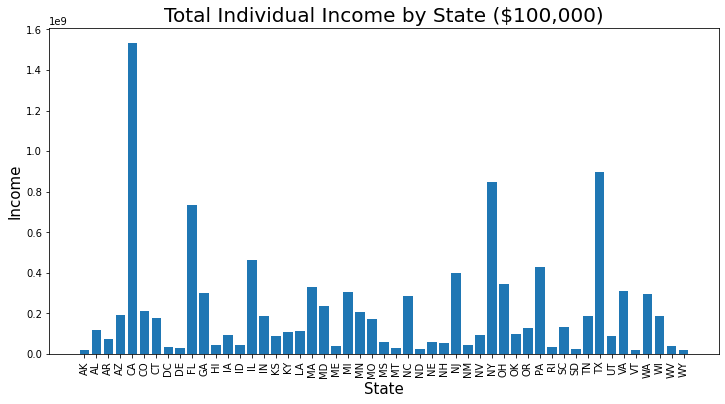

In [17]:
fig, ax = plt.subplots(figsize=(12,6))

ax.bar(irs_wip_df_grouped_state['STATE'], height=irs_wip_df_grouped_state['A02650'])
ax.set_title('Total Individual Income by State ($100,000)', size=20)
ax.set_xticklabels(irs_wip_df_grouped_state['STATE'], rotation=90)
ax.set_xlabel('State', size=15)
ax.set_ylabel('Income', size=15)
fig.savefig('../images/total_ind_income_state.png');

## NP DF Scrub

In [18]:
irs_np.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1764827 entries, 0 to 1764826
Data columns (total 29 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Unnamed: 0        int64  
 1   EIN               int64  
 2   NAME              object 
 3   ICO               object 
 4   STREET            object 
 5   CITY              object 
 6   STATE             object 
 7   ZIP               object 
 8   GROUP             int64  
 9   SUBSECTION        int64  
 10  AFFILIATION       int64  
 11  CLASSIFICATION    int64  
 12  RULING            int64  
 13  DEDUCTIBILITY     int64  
 14  FOUNDATION        int64  
 15  ACTIVITY          int64  
 16  ORGANIZATION      int64  
 17  STATUS            int64  
 18  TAX_PERIOD        float64
 19  ASSET_CD          int64  
 20  INCOME_CD         int64  
 21  FILING_REQ_CD     int64  
 22  PF_FILING_REQ_CD  int64  
 23  ACCT_PD           int64  
 24  ASSET_AMT         float64
 25  INCOME_AMT        float64
 26  REVENUE_AMT   

In [23]:
np_irs_col = irs_np.drop(['Unnamed: 0','EIN','ICO','GROUP','AFFILIATION','RULING', 'DEDUCTIBILITY', 'ACTIVITY','ORGANIZATION','STATUS', 'TAX_PERIOD','ASSET_CD','INCOME_CD','FILING_REQ_CD','PF_FILING_REQ_CD','ACCT_PD','SORT_NAME'], axis=1)

In [24]:
np_irs_col.head()

,NAME,STREET,CITY,STATE,ZIP,SUBSECTION,CLASSIFICATION,FOUNDATION,ASSET_AMT,INCOME_AMT,REVENUE_AMT,NTEE_CD
0,PALMER SECOND BAPTIST CHURCH,1050 THORNDIKE ST,PALMER,MA,01069-1507,3,7000,10,NaN,NaN,NaN,NaN
1,ST GEORGE CATHEDRAL,523 E BROADWAY,SOUTH BOSTON,MA,02127-4415,3,7000,10,NaN,NaN,NaN,NaN
2,IGLESIA BETHESDA INC,157 ANDOVER ST,LOWELL,MA,01852-2348,3,7000,10,NaN,NaN,NaN,X21
3,MINISTERIO APOSTOLICO JESUCRISTO ES EL SENOR INC,454 ESSEX ST,LAWRENCE,MA,01840-1242,3,7000,10,NaN,NaN,NaN,X21
4,MERCY CHAPEL INTERNATIONAL,75 MORTON VILLAGE DR APT 408,MATTAPAN,MA,02126-2433,3,7000,10,NaN,NaN,NaN,X20


In [46]:
#dropped all rows where rev_amt & state had null value. State null
#means out of country registered in US
np_irs_col_null = np_irs_col.dropna(subset=['STATE','REVENUE_AMT'],axis=0).drop('STREET', axis=1)

In [174]:
#i need to drop the several territories

city_np_count = pd.DataFrame(np_irs_col_null['CITY'].value_counts())
state_np_count = pd.DataFrame(np_irs_col_null['STATE'].value_counts())
city_np_count

,CITY
NEW YORK,13662
WASHINGTON,11597
CHICAGO,10581
HOUSTON,9313
LOS ANGELES,7907
...,...
CREVE COUER,1
GOLOVIN,1
BRADDYVILLE,1
TEHAMA,1


In [47]:
np_irs_col_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1258774 entries, 12 to 1764811
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   NAME            1258774 non-null  object 
 1   CITY            1258774 non-null  object 
 2   STATE           1258774 non-null  object 
 3   ZIP             1258774 non-null  object 
 4   SUBSECTION      1258774 non-null  int64  
 5   CLASSIFICATION  1258774 non-null  int64  
 6   FOUNDATION      1258774 non-null  int64  
 7   ASSET_AMT       1258774 non-null  float64
 8   INCOME_AMT      1258774 non-null  float64
 9   REVENUE_AMT     1258774 non-null  float64
 10  NTEE_CD         850459 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 115.2+ MB


In [183]:
rev_distribution = np.array(np_irs_col_null['REVENUE_AMT'])
rev_distribution

array([      0.,  123377.,  152931., ..., 1943887., 1516318., 1778221.])

In [184]:
#split zipcode & postal code so I can match with income & census data
np_irs_col_null['zipcode'] = np_irs_col_null['ZIP'].str.split('-', expand=True)[0]

In [185]:
np_irs_col_null['zipcode'].value_counts()

50312    6397
39236    1524
20036    1376
64114    1322
46268    1251
         ... 
67470       1
37729       1
84621       1
33521       1
22718       1
Name: zipcode, Length: 35517, dtype: int64

In [200]:
np_irs_col_null.astype({'zipcode':'str'})
np_irs_col_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1258774 entries, 12 to 1764811
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   NAME            1258774 non-null  object 
 1   CITY            1258774 non-null  object 
 2   STATE           1258774 non-null  object 
 3   ZIP             1258774 non-null  object 
 4   SUBSECTION      1258774 non-null  int64  
 5   CLASSIFICATION  1258774 non-null  int64  
 6   FOUNDATION      1258774 non-null  int64  
 7   ASSET_AMT       1258774 non-null  float64
 8   INCOME_AMT      1258774 non-null  float64
 9   REVENUE_AMT     1258774 non-null  float64
 10  NTEE_CD         850459 non-null   object 
 11  zipcode         1258774 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 124.8+ MB


## Census DF Scrub

In [64]:
cen_income.head()

,Unnamed: 0,0,NAME,GEO_ID,DP03_0068E,DP03_0069E,DP03_0066E,DP03_0067E,DP03_0064E,DP03_0065E,...,DP03_0059E,DP03_0056E,DP03_0057E,DP03_0054E,DP03_0055E,DP03_0052E,DP03_0053E,DP03_0051E,state,place
0,1,1,"Flagstaff city, Arizona",1600000US0423620,3276,38228,4724,22123,21587,74232,...,3755,3427,4624,2494,1575,2063,812,24569,4,23620
1,2,2,"Gilbert town, Arizona",1600000US0427400,12521,28587,17979,22959,69218,115612,...,20085,4961,12327,2754,3192,2005,924,78555,4,27400
2,3,3,"San Tan Valley CDP, Arizona",1600000US0464210,6303,32607,8569,22021,26304,77745,...,5822,3246,8844,1922,1902,1331,268,32608,4,64210
3,4,4,"Fort Smith city, Arkansas",1600000US0524550,6364,19062,10113,19234,27759,65380,...,4000,5947,5485,3735,4875,2798,2725,35442,5,24550
4,5,5,"Jonesboro city, Arkansas",1600000US0535710,3842,26589,8659,18095,23795,62044,...,2367,4122,5924,4571,2590,3248,1253,29492,5,35710


In [151]:
cen_income['CITY'] = cen_income['NAME'].str.split(',', expand=True)[0]
cen_income['STATE'] = cen_income['NAME'].str.split(',', expand=True)[1]

In [152]:
cen_income.head()

,Unnamed: 0,0,NAME,GEO_ID,DP03_0068E,DP03_0069E,DP03_0066E,DP03_0067E,DP03_0064E,DP03_0065E,...,DP03_0057E,DP03_0054E,DP03_0055E,DP03_0052E,DP03_0053E,DP03_0051E,state,place,CITY,STATE
0,1,1,"Flagstaff city, Arizona",1600000US0423620,3276,38228,4724,22123,21587,74232,...,4624,2494,1575,2063,812,24569,4,23620,Flagstaff city,Arizona
1,2,2,"Gilbert town, Arizona",1600000US0427400,12521,28587,17979,22959,69218,115612,...,12327,2754,3192,2005,924,78555,4,27400,Gilbert town,Arizona
2,3,3,"San Tan Valley CDP, Arizona",1600000US0464210,6303,32607,8569,22021,26304,77745,...,8844,1922,1902,1331,268,32608,4,64210,San Tan Valley CDP,Arizona
3,4,4,"Fort Smith city, Arkansas",1600000US0524550,6364,19062,10113,19234,27759,65380,...,5485,3735,4875,2798,2725,35442,5,24550,Fort Smith city,Arkansas
4,5,5,"Jonesboro city, Arkansas",1600000US0535710,3842,26589,8659,18095,23795,62044,...,5924,4571,2590,3248,1253,29492,5,35710,Jonesboro city,Arkansas


In [153]:
del_word = ['city', 'town', 'village', 'CDP', 'county', 'consolidated', 'Urban', 'Count', 'government',  ]

def split_words(col_array, del_words_list):
       return col_array.str.split(' ').apply(lambda x: ' '.join([word for word in x if word not in del_words_list]))

cen_income['CITY'] = split_words(cen_income['CITY'], del_word)
        
        #word for word in x if word not in del_word

In [154]:
cen_income_clean = cen_income.copy()
cen_income_clean.to_csv('../data/eda_cen_income_data.csv')

In [156]:
cen_income_clean

,Unnamed: 0,0,NAME,GEO_ID,DP03_0068E,DP03_0069E,DP03_0066E,DP03_0067E,DP03_0064E,DP03_0065E,...,DP03_0057E,DP03_0054E,DP03_0055E,DP03_0052E,DP03_0053E,DP03_0051E,state,place,CITY,STATE
0,1,1,"Flagstaff city, Arizona",1600000US0423620,3276,38228,4724,22123,21587,74232,...,4624,2494,1575,2063,812,24569,4,23620,Flagstaff,Arizona
1,2,2,"Gilbert town, Arizona",1600000US0427400,12521,28587,17979,22959,69218,115612,...,12327,2754,3192,2005,924,78555,4,27400,Gilbert,Arizona
2,3,3,"San Tan Valley CDP, Arizona",1600000US0464210,6303,32607,8569,22021,26304,77745,...,8844,1922,1902,1331,268,32608,4,64210,San Tan Valley,Arizona
3,4,4,"Fort Smith city, Arkansas",1600000US0524550,6364,19062,10113,19234,27759,65380,...,5485,3735,4875,2798,2725,35442,5,24550,Fort Smith,Arkansas
4,5,5,"Jonesboro city, Arkansas",1600000US0535710,3842,26589,8659,18095,23795,62044,...,5924,4571,2590,3248,1253,29492,5,35710,Jonesboro,Arkansas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,626,626,"The Woodlands CDP, Texas",1600000US4872656,5412,28285,9163,23842,34512,177427,...,4061,2029,1127,1502,315,40491,48,72656,The Woodlands,Texas
626,627,627,"Chesapeake city, Virginia",1600000US5116000,25907,29268,25595,19785,69163,94902,...,13561,4804,5853,3787,2001,86122,51,16000,Chesapeake,Virginia
627,628,628,"Roanoke city, Virginia",1600000US5168000,6252,23500,13583,17461,30959,67922,...,5586,5403,5918,3928,2707,41353,51,68000,Roanoke,Virginia
628,629,629,"Everett city, Washington",1600000US5322640,7089,23681,12734,18557,35353,82091,...,8093,3150,4003,1798,1593,43260,53,22640,Everett,Washington


In [213]:
income_np_merge = pd.merge(irs_wip, np_irs_col_null, on='zipcode')

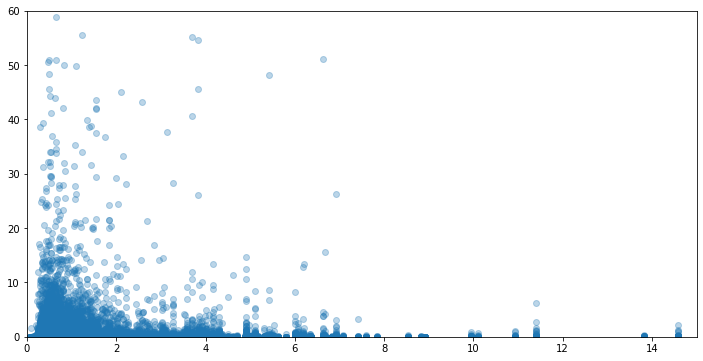

In [286]:
x = income_np_merge['avg_income']/100
y = income_np_merge['REVENUE_AMT']/100000000


# y = np.linspace(0,1000000,200000000)


plt.figure(figsize=(12,6))
# plt.yticks(y)
plt.ylim(0,60)
plt.xlim(0,15)
plt.
plt.scatter(x, y, alpha=.3)
plt.show()

#need to remove some outliers that are skewing my data

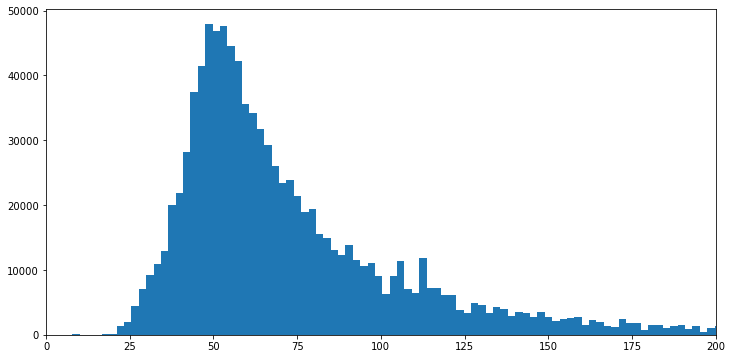

In [239]:
x = income_np_merge['avg_income']


plt.figure(figsize=(12,6))
plt.xlim(0, 200)
plt.hist(x, bins=1000)
plt.show()

#pareto distribution which is very typical for income 80% pop only has 20% of wealth/income

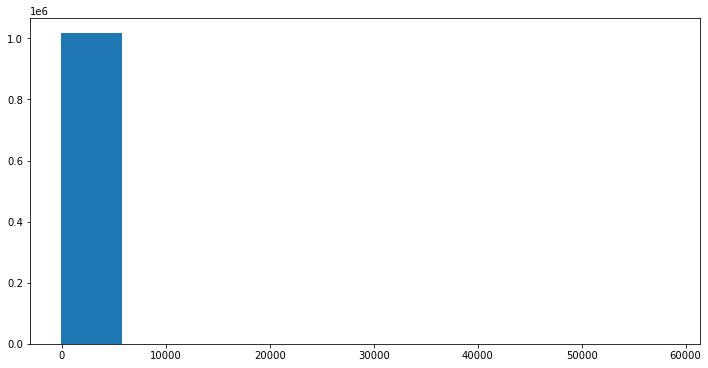

0          0.154543
1          6.823299
2          0.000000
3          0.883302
4          0.000000
             ...   
1017126    0.000000
1017127    0.000000
1017128    0.225000
1017129    0.000000
1017130    0.000000
Name: REVENUE_AMT, Length: 1017131, dtype: float64

In [287]:
x = income_np_merge['REVENUE_AMT']/1000000


plt.figure(figsize=(12,6))
# plt.xlim(0, 1000)
plt.hist(x, bins=10)
plt.show()
x

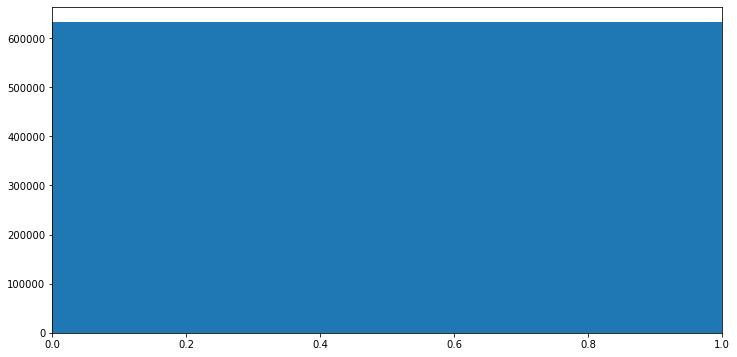

In [265]:
revs = income_np_merge[income_np_merge['REVENUE_AMT']< 10000]['REVENUE_AMT']

revs

plt.figure(figsize=(12,6))
plt.xlim(0, )
plt.hist(revs, bins=1000)
plt.show()

In [212]:
np_irs_col_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1258774 entries, 12 to 1764811
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   NAME            1258774 non-null  object 
 1   CITY            1258774 non-null  object 
 2   STATE           1258774 non-null  object 
 3   ZIP             1258774 non-null  object 
 4   SUBSECTION      1258774 non-null  int64  
 5   CLASSIFICATION  1258774 non-null  int64  
 6   FOUNDATION      1258774 non-null  int64  
 7   ASSET_AMT       1258774 non-null  float64
 8   INCOME_AMT      1258774 non-null  float64
 9   REVENUE_AMT     1258774 non-null  float64
 10  NTEE_CD         850459 non-null   object 
 11  zipcode         1258774 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 124.8+ MB


In [ ]:
irs